- **Nama:** [Dhimas Sena Rahmantara]
- **Email:** [dhimassr@gmail.com]

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.listdir()

['.ipynb_checkpoints', 'housing.csv', 'housing.ipynb']

In [6]:
housing_df = pd.read_csv('housing.csv')
housing_df

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²
...,...,...,...,...,...,...,...,...,...
2015,Rp 500 Juta,https://www.rumah123.com/properti/sleman/hos17...,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²
2016,Rp 750 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²
2017,Rp 756 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²
2018,"Rp 1,78 Miliar",https://www.rumah123.com/properti/sleman/hos16...,Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²


In [8]:
housing_df.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [10]:
housing_df.duplicated().sum()

0

In [12]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,2001.0,3.969015,3.671654,1.0,2.0,3.0,4.0,49.0
bath,1999.0,2.941971,3.517671,1.0,1.0,2.0,3.0,49.0
carport,1713.0,1.559253,1.283030,1.0,1.0,1.0,2.0,15.0


In [14]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [15]:
np.unique(housing_df['price'])

array(['Rp 1 Miliar', 'Rp 1,08 Miliar', 'Rp 1,1 Miliar', 'Rp 1,15 Miliar',
       'Rp 1,17 Miliar', 'Rp 1,2 Miliar', 'Rp 1,25 Miliar',
       'Rp 1,26 Miliar', 'Rp 1,27 Miliar', 'Rp 1,28 Miliar',
       'Rp 1,29 Miliar', 'Rp 1,3 Miliar', 'Rp 1,31 Miliar',
       'Rp 1,34 Miliar', 'Rp 1,35 Miliar', 'Rp 1,37 Miliar',
       'Rp 1,38 Miliar', 'Rp 1,39 Miliar', 'Rp 1,4 Miliar',
       'Rp 1,42 Miliar', 'Rp 1,45 Miliar', 'Rp 1,47 Miliar',
       'Rp 1,48 Miliar', 'Rp 1,49 Miliar', 'Rp 1,5 Miliar',
       'Rp 1,52 Miliar', 'Rp 1,54 Miliar', 'Rp 1,55 Miliar',
       'Rp 1,56 Miliar', 'Rp 1,59 Miliar', 'Rp 1,6 Miliar',
       'Rp 1,65 Miliar', 'Rp 1,67 Miliar', 'Rp 1,69 Miliar',
       'Rp 1,7 Miliar', 'Rp 1,72 Miliar', 'Rp 1,75 Miliar',
       'Rp 1,77 Miliar', 'Rp 1,78 Miliar', 'Rp 1,79 Miliar',
       'Rp 1,8 Miliar', 'Rp 1,82 Miliar', 'Rp 1,85 Miliar',
       'Rp 1,87 Miliar', 'Rp 1,88 Miliar', 'Rp 1,89 Miliar',
       'Rp 1,9 Miliar', 'Rp 1,92 Miliar', 'Rp 1,94 Miliar',
       'Rp 1,95 Mi

In [16]:
np.unique(housing_df['bed'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 20., 21., 22., 23., 24., 26., 29., 30.,
       31., 34., 36., 40., 47., 49., nan])

In [18]:
np.unique(housing_df['carport'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 15., nan])

In [20]:
np.unique(housing_df['bath'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 20., 21., 22., 24., 28., 30., 31., 32.,
       36., 40., 42., 47., 49., nan])

In [22]:
housing_df['bed'].value_counts()

bed
3.0     783
2.0     502
4.0     332
5.0     140
6.0      42
7.0      34
10.0     26
1.0      23
8.0      19
12.0     16
11.0     15
13.0     14
9.0       9
15.0      8
14.0      7
17.0      4
16.0      4
20.0      4
30.0      3
40.0      2
22.0      2
34.0      2
23.0      1
24.0      1
21.0      1
47.0      1
26.0      1
36.0      1
18.0      1
29.0      1
49.0      1
31.0      1
Name: count, dtype: int64

In [24]:
housing_df['bath'].value_counts()

bath
2.0     618
1.0     563
3.0     449
4.0     159
5.0      59
6.0      36
11.0     19
10.0     17
12.0     14
8.0      10
9.0       9
7.0       8
13.0      8
15.0      7
14.0      3
31.0      2
22.0      2
30.0      2
17.0      2
21.0      1
47.0      1
20.0      1
28.0      1
24.0      1
36.0      1
18.0      1
42.0      1
16.0      1
49.0      1
32.0      1
40.0      1
Name: count, dtype: int64

In [26]:
# get numeric value
housing_df['sa_num'] = housing_df['surface_area'].str.extract('(\\d+)').astype('float64')
housing_df['ba_num'] = housing_df['building_area'].str.extract('(\\d+)').astype('float64')
housing_df.head(50)

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²,120.0,110.0
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²,102.0,126.0
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²,100.0,100.0
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,109.0,67.0
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²,60.0,30.0
5,"Rp 1,47 Miliar",https://www.rumah123.com/properti/sleman/hos17...,RUMAH 2 LANTAI MANGKU JALAN ASPAL DEPOK MAGUWO...,"Depok, Sleman",5.0,3.0,1.0,125 m²,157 m²,125.0,157.0
6,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Tersisa 1 Unit Rumah Murah 5 Menit Dari Candi ...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,109.0,67.0
7,"Rp 2,1 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Kost Putri + Rumah Induk Dekat Kampus UMY,"Gamping, Sleman",11.0,11.0,2.0,206 m²,290 m²,206.0,290.0
8,"Rp 1,6 Miliar",https://www.rumah123.com/properti/sleman/hos17...,2 Rumah dengan Tanah luas Dekat Pasar Jangkang,"Ngaglik, Sleman",5.0,4.0,2.0,300 m²,200 m²,300.0,200.0
9,"Rp 2,4 Miliar",https://www.rumah123.com/properti/yogyakarta/h...,Rumah Bonus Tanah Bangun Kos Dekat Kampus Dan ...,"Kaliurang, Yogyakarta",3.0,3.0,1.0,403 m²,220 m²,403.0,220.0


In [28]:
housing_df[housing_df['bed'].isna()]

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
282,"Rp 1,6 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Dijual homestay rumah jawa klasik prambanan,"Prambanan, Sleman",NaN,NaN,NaN,530 m²,300 m²,530.0,300.0
321,Rp 695 Juta,https://www.rumah123.com/properti/yogyakarta/h...,"Rumah Baru SHM di Jl Ringroud Utara, Yogyakarta","Maguwoharjo, Yogyakarta",NaN,NaN,NaN,94 m²,64 m²,94.0,64.0
357,"Rp 1,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,VILLA MURAH !! Cocok Untuk Tempat Ngadem Villa...,"Turi, Sleman",NaN,NaN,NaN,976 m²,250 m²,976.0,250.0
416,"Rp 2,9 Miliar",https://www.rumah123.com/properti/yogyakarta/h...,"Butuh Segera, Glagah Sari, Umbulharjo, Rmh hit...","Umbulharjo, Yogyakarta",NaN,NaN,NaN,365 m²,250 m²,365.0,250.0
651,"Rp 1,99 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Dijual murah koskosan 2 lantai depok,"Depok, Sleman",NaN,NaN,NaN,194 m²,300 m²,194.0,300.0
666,Rp 950 Juta,https://www.rumah123.com/properti/yogyakarta/h...,900 Jutaan Kos Siap Bangun Dekat Kampus Uad,"Umbulharjo, Yogyakarta",NaN,NaN,NaN,72 m²,80 m²,72.0,80.0
807,Rp 890 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH CANTIK DEKAT STADION MAGUWOHARJO SLEMAN,"Sleman, Sleman",NaN,NaN,NaN,107 m²,90 m²,107.0,90.0
881,"Rp 3,2 Miliar",https://www.rumah123.com/properti/sleman/hos16...,Rumah 2 Lantai Utara Hotel Hyatt,"Ngaglik, Sleman",NaN,NaN,NaN,252 m²,350 m²,252.0,350.0
1051,"Rp 1,25 Miliar",https://www.rumah123.com/properti/sleman/hos16...,Rumah 2 Lantai Di Taman Krajan Barat Candi Gebang,"Sleman, Sleman",NaN,NaN,NaN,90 m²,170 m²,90.0,170.0
1205,"Rp 2,5 Miliar",https://www.rumah123.com/properti/sleman/hos15...,"Rumah Cantik Full Furnished, Sukoharjo, Ngagli...","Ngaglik, Sleman",NaN,NaN,NaN,450 m²,200 m²,450.0,200.0


In [30]:
desc_rumah = housing_df['description'].str.lower().str.contains("rumah", regex=False, na=False).astype(int)
desc_rumah.head(50)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    0
18    1
19    1
20    1
21    1
22    1
23    0
24    1
25    1
26    1
27    0
28    1
29    1
30    1
31    1
32    0
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    0
49    1
Name: description, dtype: int32

In [32]:
# asumsi jika bed atau bath <= 5, maka jenisnya rumah

for i in range(0, len(housing_df), 1):
    if (pd.isnull(housing_df.at[i, 'bed']) and desc_rumah[i] == True):
        housing_df.loc[i, 'bed'] = random.randint(1, 5)

for i in range(0, len(housing_df), 1):
    if (pd.isnull(housing_df.at[i, 'bath']) and desc_rumah[i] == True):
        housing_df.loc[i, 'bath'] = random.randint(1, 5)

In [34]:
housing_df[housing_df['bed'].isna()]

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
357,"Rp 1,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,VILLA MURAH !! Cocok Untuk Tempat Ngadem Villa...,"Turi, Sleman",NaN,NaN,NaN,976 m²,250 m²,976.0,250.0
416,"Rp 2,9 Miliar",https://www.rumah123.com/properti/yogyakarta/h...,"Butuh Segera, Glagah Sari, Umbulharjo, Rmh hit...","Umbulharjo, Yogyakarta",NaN,NaN,NaN,365 m²,250 m²,365.0,250.0
651,"Rp 1,99 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Dijual murah koskosan 2 lantai depok,"Depok, Sleman",NaN,NaN,NaN,194 m²,300 m²,194.0,300.0
666,Rp 950 Juta,https://www.rumah123.com/properti/yogyakarta/h...,900 Jutaan Kos Siap Bangun Dekat Kampus Uad,"Umbulharjo, Yogyakarta",NaN,NaN,NaN,72 m²,80 m²,72.0,80.0
1283,Rp 4 Miliar,https://www.rumah123.com/properti/sleman/hos17...,PERUM GREEN HILLS RESIDENCE,"Ngaglik, Sleman",NaN,NaN,NaN,203 m²,280 m²,203.0,280.0
1606,Rp 593 Juta,https://www.rumah123.com/properti/bantul/hos17...,"Hunian dekat kampus UMY, one gate sistem","Kasihan, Bantul",NaN,NaN,NaN,91 m²,36 m²,91.0,36.0


In [36]:
housing_df[housing_df['bath'].isna()]

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
357,"Rp 1,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,VILLA MURAH !! Cocok Untuk Tempat Ngadem Villa...,"Turi, Sleman",NaN,NaN,NaN,976 m²,250 m²,976.0,250.0
416,"Rp 2,9 Miliar",https://www.rumah123.com/properti/yogyakarta/h...,"Butuh Segera, Glagah Sari, Umbulharjo, Rmh hit...","Umbulharjo, Yogyakarta",NaN,NaN,NaN,365 m²,250 m²,365.0,250.0
651,"Rp 1,99 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Dijual murah koskosan 2 lantai depok,"Depok, Sleman",NaN,NaN,NaN,194 m²,300 m²,194.0,300.0
666,Rp 950 Juta,https://www.rumah123.com/properti/yogyakarta/h...,900 Jutaan Kos Siap Bangun Dekat Kampus Uad,"Umbulharjo, Yogyakarta",NaN,NaN,NaN,72 m²,80 m²,72.0,80.0
1283,Rp 4 Miliar,https://www.rumah123.com/properti/sleman/hos17...,PERUM GREEN HILLS RESIDENCE,"Ngaglik, Sleman",NaN,NaN,NaN,203 m²,280 m²,203.0,280.0
1606,Rp 593 Juta,https://www.rumah123.com/properti/bantul/hos17...,"Hunian dekat kampus UMY, one gate sistem","Kasihan, Bantul",NaN,NaN,NaN,91 m²,36 m²,91.0,36.0


In [38]:
for i in range(0, len(housing_df), 1):
    if (pd.isna(housing_df.at[i, 'bed']) and pd.isna(housing_df.at[i, 'bath'])):
        housing_df.loc[i, 'bed'] = random.randint(1, 5)
        housing_df.loc[i, 'bath'] = random.randint(1, 5)

In [40]:
housing_df.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                   0
bath                  0
carport             307
surface_area          1
building_area         1
sa_num                1
ba_num                1
dtype: int64

In [42]:
housing_df['carport'].value_counts()

carport
1.0     1156
2.0      419
3.0       50
4.0       39
8.0       14
6.0       11
5.0        9
10.0       6
7.0        5
15.0       2
11.0       1
12.0       1
Name: count, dtype: int64

In [44]:
housing_df[housing_df['carport'].isna()]

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
25,"Rp 5,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,RUMAH DIJUAL CEPAT DI CATUR TUNGGAL DEPOK SLEMAN,"Depok, Sleman",3.0,2.0,NaN,275 m²,275 m²,275.0,275.0
31,"Rp 3,1 Miliar",https://www.rumah123.com/properti/bantul/hos17...,RUMAH DIJUAL CEPAT DI PONDOK PERMAI KADIPIRO J...,"Kasihan, Bantul",5.0,3.0,NaN,146 m²,290 m²,146.0,290.0
34,"Rp 2,5 Miliar",https://www.rumah123.com/properti/bantul/hos17...,RUMAH DIJUAL CEPAT DI PERUM LAGUNA SPRING JALA...,"Bantul, Bantul",6.0,4.0,NaN,128 m²,130 m²,128.0,130.0
36,Rp 10 Miliar,https://www.rumah123.com/properti/sleman/hos17...,Rumah Bagus Di Jl Sekolah Mataram Dusun Jambo...,"Sleman, Sleman",5.0,3.0,NaN,848 m²,427 m²,848.0,427.0
44,Rp 500 Juta,https://www.rumah123.com/properti/sleman/hos17...,"Dijual Rumah Di Perumahan, Sanggrahan, Purwoma...","Condong Catur, Sleman",3.0,1.0,NaN,72 m²,90 m²,72.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
1953,"Rp 3,7 Miliar",https://www.rumah123.com/properti/bantul/hos17...,RUMAH DIJUAL CEPAT DI GRAND BALE AND RESORT BA...,"Bantul, Bantul",4.0,4.0,NaN,305 m²,270 m²,305.0,270.0
1968,Rp 5 Miliar,https://www.rumah123.com/properti/gunung-kidul...,"RESTAURANT AYAM TALIWANG, DEKAT WISATA GOA PINDUL","Karangmojo, Gunung Kidul",4.0,2.0,NaN,4 m²,300 m²,4.0,300.0
1985,Rp 743 Juta,https://www.rumah123.com/properti/bantul/hos17...,Rumah 2 Lantai Hunian di Jogja Barat dekat Mal...,"Kasihan, Bantul",2.0,4.0,NaN,81 m²,75 m²,81.0,75.0
2012,"Rp 2,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Bu Dijual Rumah Murah Banget Di Maguwoharjo Sl...,"Depok, Sleman",4.0,3.0,NaN,123 m²,200 m²,123.0,200.0


In [46]:
# asumsi tiap rumah setidaknya ada 1 carport
housing_df['carport'] = housing_df['carport'].fillna(1)

In [48]:
housing_df.isna().sum()

price               0
nav-link            0
description         0
listing-location    0
bed                 0
bath                0
carport             0
surface_area        1
building_area       1
sa_num              1
ba_num              1
dtype: int64

In [50]:
housing_df['carport'].value_counts()

carport
1.0     1463
2.0      419
3.0       50
4.0       39
8.0       14
6.0       11
5.0        9
10.0       6
7.0        5
15.0       2
11.0       1
12.0       1
Name: count, dtype: int64

In [52]:
housing_df[housing_df['building_area'].isna()]

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
406,Rp 725 Juta,https://www.rumah123.com/properti/sleman/hos16...,Rumah Minimalis 2 Kamar Siap Huni Di Perum For...,"Sleman, Sleman",2.0,1.0,1.0,NaN,NaN,NaN,NaN


In [54]:
# didrop karena surface_area & building_area tidak bisa diasumsikan, harus diukur & hanya 1 data
housing_df = housing_df.drop(housing_df[housing_df['surface_area'].isna()].index)
housing_df = housing_df.reset_index()
housing_df = housing_df.drop('index', axis=1)
housing_df = housing_df.drop('nav-link', axis=1)

In [56]:
housing_df[housing_df['building_area'].isna()]

,price,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num


In [58]:
housing_df.isna().sum()

price               0
description         0
listing-location    0
bed                 0
bath                0
carport             0
surface_area        0
building_area       0
sa_num              0
ba_num              0
dtype: int64

In [60]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2019 non-null   object 
 1   description       2019 non-null   object 
 2   listing-location  2019 non-null   object 
 3   bed               2019 non-null   float64
 4   bath              2019 non-null   float64
 5   carport           2019 non-null   float64
 6   surface_area      2019 non-null   object 
 7   building_area     2019 non-null   object 
 8   sa_num            2019 non-null   float64
 9   ba_num            2019 non-null   float64
dtypes: float64(5), object(5)
memory usage: 157.9+ KB


In [62]:
# add col id
# housing_df['id'] = housing_df.index
# housing_df.insert(0, 'id', housing_df.pop('id'))
housing_df

,price,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num
0,"Rp 1,79 Miliar",Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²,120.0,110.0
1,Rp 170 Juta,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²,102.0,126.0
2,Rp 695 Juta,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²,100.0,100.0
3,Rp 560 Juta,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,109.0,67.0
4,Rp 200 Juta,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²,60.0,30.0
...,...,...,...,...,...,...,...,...,...,...
2014,Rp 500 Juta,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²,104.0,80.0
2015,Rp 750 Juta,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²,89.0,60.0
2016,Rp 756 Juta,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²,140.0,60.0
2017,"Rp 1,78 Miliar",Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²,118.0,160.0


**Konversi Kolom Price Menjadi Float**

In [74]:
price = housing_df['price'].str.extract('(\\d+)').astype('float64')[0]
# price
price_str = housing_df['price'].str.lower().str.contains(r'juta', case=False, na=False)
# price_str.value_counts()

for i in range(len(price_str)):
    # print(price_str[i])
    if (price_str[i] == True):
        # untuk rumah harga juta
        housing_df.loc[i, 'price_num'] = price[i] * 1000000
        
    else:
        # untuk rumah harga miliar
        housing_df.loc[i, 'price_num'] = housing_df.at[i, 'price'][3:]
        housing_df.loc[i, 'price_num'] = housing_df.at[i, 'price_num'].rstrip(' Miliar')
        housing_df.loc[i, 'price_num'] = housing_df.at[i, 'price_num'].replace(',', '.')
        housing_df.loc[i, 'price_num'] = pd.to_numeric(housing_df.loc[i, 'price_num']).astype('float64')
        housing_df.loc[i, 'price_num'] = housing_df.loc[i, 'price_num'] * 1000000000

housing_df['price_num'] = housing_df['price_num'].apply(pd.to_numeric)
housing_df

,price,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num,price_num
0,"Rp 1,79 Miliar",Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²,120.0,110.0,1.790000e+09
1,Rp 170 Juta,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²,102.0,126.0,1.700000e+08
2,Rp 695 Juta,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²,100.0,100.0,6.950000e+08
3,Rp 560 Juta,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,109.0,67.0,5.600000e+08
4,Rp 200 Juta,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²,60.0,30.0,2.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...
2014,Rp 500 Juta,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²,104.0,80.0,5.000000e+08
2015,Rp 750 Juta,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²,89.0,60.0,7.500000e+08
2016,Rp 756 Juta,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²,140.0,60.0,7.560000e+08
2017,"Rp 1,78 Miliar",Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²,118.0,160.0,1.780000e+09


In [76]:
housing_df['price_num'].isna().sum()

0

In [78]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2019 non-null   object 
 1   description       2019 non-null   object 
 2   listing-location  2019 non-null   object 
 3   bed               2019 non-null   float64
 4   bath              2019 non-null   float64
 5   carport           2019 non-null   float64
 6   surface_area      2019 non-null   object 
 7   building_area     2019 non-null   object 
 8   sa_num            2019 non-null   float64
 9   ba_num            2019 non-null   float64
 10  price_num         2019 non-null   float64
dtypes: float64(6), object(5)
memory usage: 173.6+ KB


In [80]:
housing_df['bed'].corr(housing_df['price_num'])

0.4612830703886053

In [82]:
housing_df['bath'].corr(housing_df['price_num'])

0.4538788426890146

In [84]:
housing_df['sa_num'].corr(housing_df['price_num'])

0.6066457044257735

In [86]:
housing_df['ba_num'].corr(housing_df['price_num'])

0.0046128693127396835

In [88]:
housing_df['carport'].corr(housing_df['price_num'])

0.34234963284101705

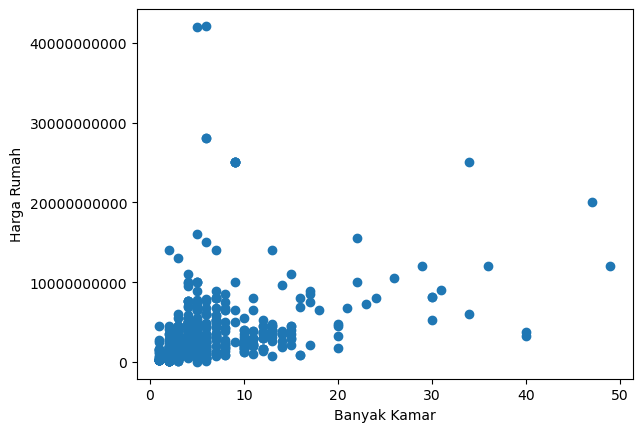

In [90]:
plt.scatter(housing_df['bed'], housing_df['price_num'])
plt.ticklabel_format(style='plain')
plt.xlabel("Banyak Kamar")
plt.ylabel("Harga Rumah")
plt.show()

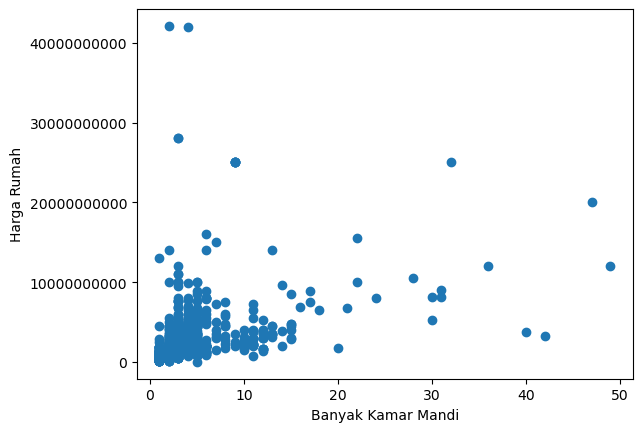

In [92]:
plt.scatter(housing_df['bath'], housing_df['price_num'])
plt.ticklabel_format(style='plain')
plt.xlabel("Banyak Kamar Mandi")
plt.ylabel("Harga Rumah")
plt.show()

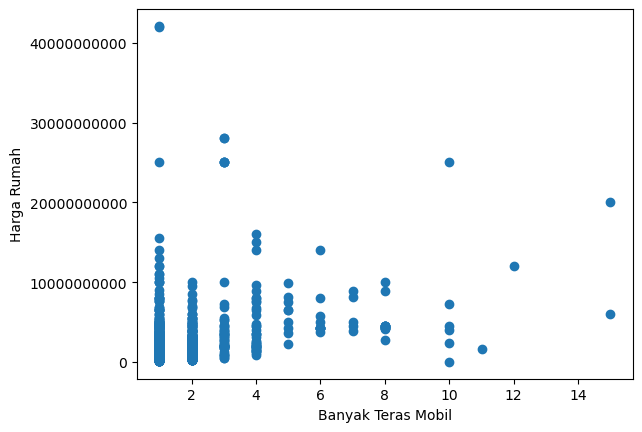

In [94]:
plt.scatter(housing_df['carport'], housing_df['price_num'])
plt.ticklabel_format(style='plain')
plt.xlabel("Banyak Teras Mobil")
plt.ylabel("Harga Rumah")
plt.show()

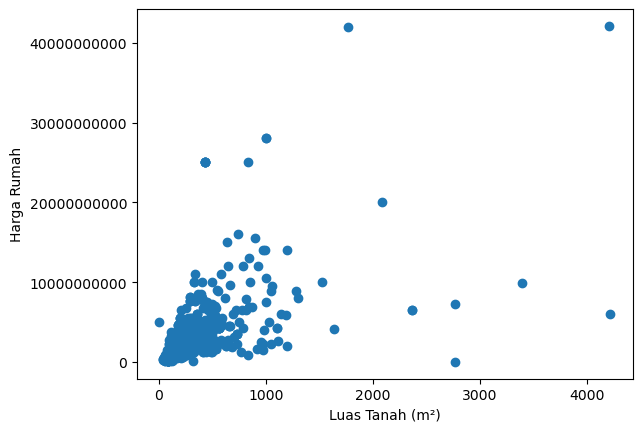

In [96]:
plt.scatter(housing_df['sa_num'], housing_df['price_num'])
plt.ticklabel_format(style='plain')
plt.xlabel("Luas Tanah (m²)")
plt.ylabel("Harga Rumah")
plt.show()

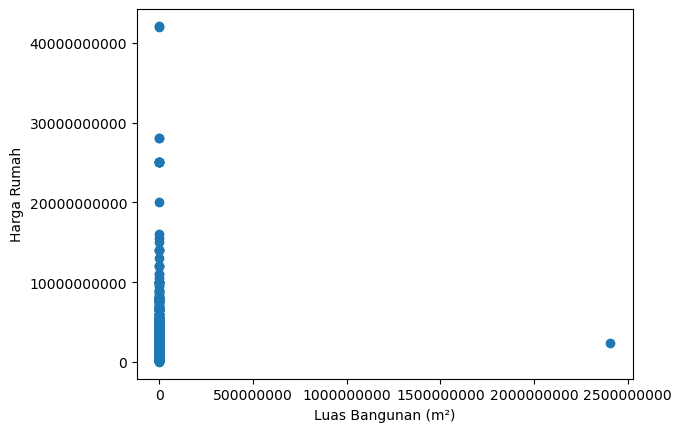

In [98]:
plt.scatter(housing_df['ba_num'], housing_df['price_num'])
plt.ticklabel_format(style='plain')
plt.xlabel("Luas Bangunan (m²)")
plt.ylabel("Harga Rumah")
plt.show()

In [100]:
housing_df[(housing_df['ba_num'] > 2000000000) & (housing_df['ba_num'] < 2500000000)]

,price,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num,price_num
1089,"Rp 2,4 Miliar",Dijual Rumah Mewah Bonus 1 Rumah Sleman Jogja,"Sleman, Sleman",4.0,3.0,1.0,182 m²,2408150000 m²,182.0,2.408150e+09,2.400000e+09


In [102]:
# hapus outlier
housing_df = housing_df.drop(1089, axis=0)
housing_df = housing_df.reset_index()
housing_df = housing_df.drop('index', axis=1)
housing_df

,price,description,listing-location,bed,bath,carport,surface_area,building_area,sa_num,ba_num,price_num
0,"Rp 1,79 Miliar",Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²,120.0,110.0,1.790000e+09
1,Rp 170 Juta,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²,102.0,126.0,1.700000e+08
2,Rp 695 Juta,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²,100.0,100.0,6.950000e+08
3,Rp 560 Juta,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²,109.0,67.0,5.600000e+08
4,Rp 200 Juta,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²,60.0,30.0,2.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...
2013,Rp 500 Juta,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²,104.0,80.0,5.000000e+08
2014,Rp 750 Juta,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²,89.0,60.0,7.500000e+08
2015,Rp 756 Juta,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²,140.0,60.0,7.560000e+08
2016,"Rp 1,78 Miliar",Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²,118.0,160.0,1.780000e+09


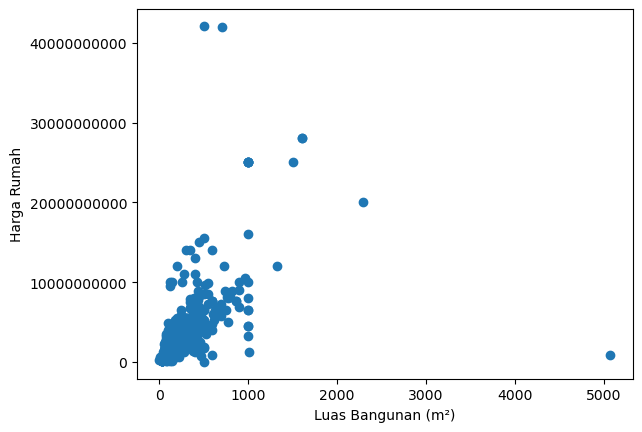

In [104]:
plt.scatter(housing_df['ba_num'], housing_df['price_num'])
plt.ticklabel_format(style='plain')
plt.xlabel("Luas Bangunan (m²)")
plt.ylabel("Harga Rumah")
plt.show()

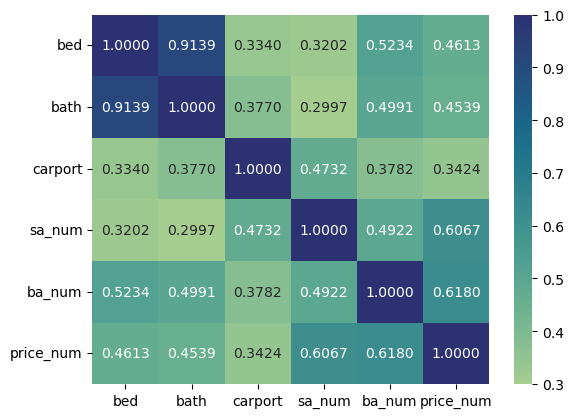

In [106]:
sns.heatmap(housing_df.corr(numeric_only=True), annot=True, cmap='crest', fmt='.4f')
plt.show()

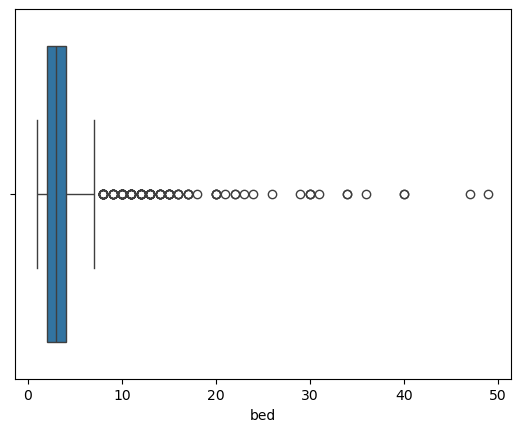

In [108]:
sns.boxplot(data=housing_df, x='bed')
plt.show()

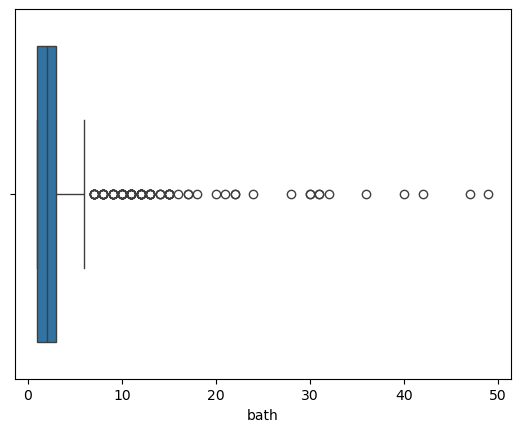

In [110]:
sns.boxplot(data=housing_df, x='bath')
plt.show()

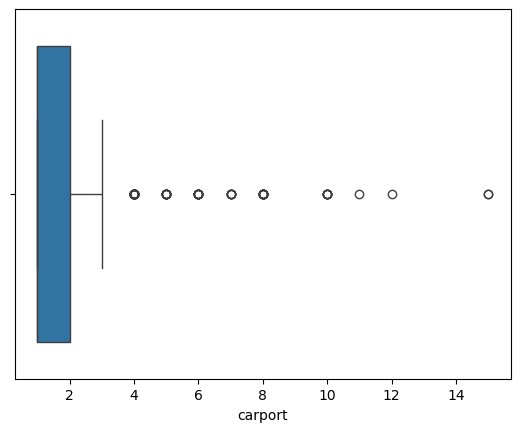

In [112]:
sns.boxplot(data=housing_df, x='carport')
plt.show()

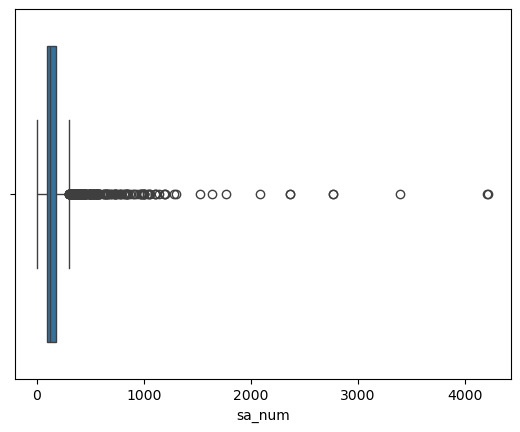

In [114]:
sns.boxplot(data=housing_df, x='sa_num')
plt.show()

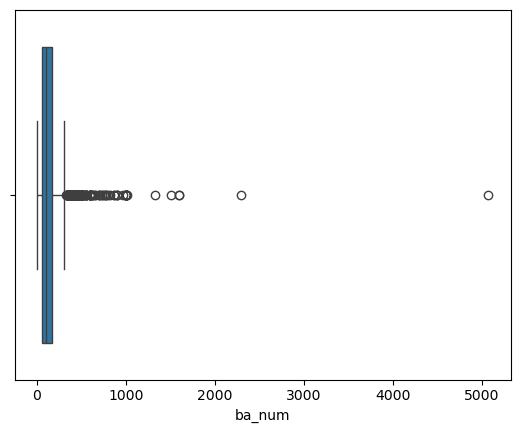

In [116]:
sns.boxplot(data=housing_df, x='ba_num')
plt.show()

**Prediksi harga berdasarkan banyak kamar tidur**

In [124]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='price_num ~ bed', data=housing_df).fit()
lm.params

Intercept    4.926514e+08
bed          3.404321e+08
dtype: float64

In [126]:
X_new = pd.DataFrame({'bed': [housing_df['bed'].min(), housing_df['bed'].max()]})
X_new.head()

,bed
0,1.0
1,49.0


In [128]:
preds = lm.predict(X_new)
preds

0    8.330835e+08
1    1.717382e+10
dtype: float64

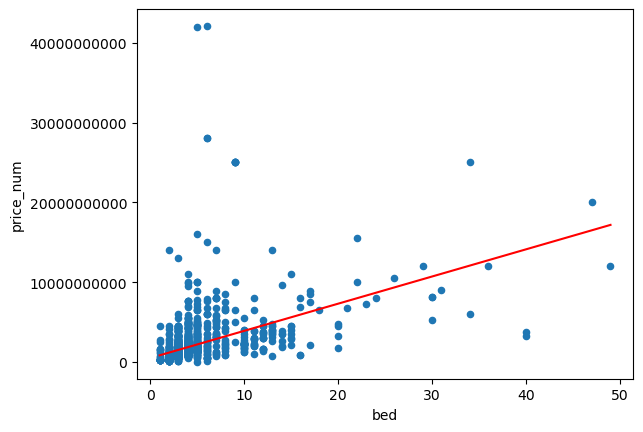

In [174]:
housing_df.plot(kind='scatter', x='bed', y='price_num')
plt.plot(X_new, preds, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [167]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,3.384608e+08,6.468420e+08
bed,3.118319e+08,3.690323e+08


In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
bed = np.array(housing_df['bed'])
bed = bed.reshape(-1,1)
model.fit(bed, housing_df['price_num'])

LinearRegression()

In [156]:
kamar_tidur = np.array([housing_df.bed.min(),1,2,3,4,5,10,15,20,30,housing_df.bed.max()]).reshape(-1,1)
kamar_tidur

array([[ 1.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [10.],
       [15.],
       [20.],
       [30.],
       [49.]])

In [158]:
prediksi_harga = model.predict(kamar_tidur)
prediksi_harga

array([8.33083505e+08, 8.33083505e+08, 1.17351560e+09, 1.51394770e+09,
       1.85437980e+09, 2.19481190e+09, 3.89697238e+09, 5.59913287e+09,
       7.30129336e+09, 1.07056143e+10, 1.71738242e+10])

In [160]:
for kt, hrg in zip(kamar_tidur, prediksi_harga):
    print(f"kamar tidur: {kt} prediksi harga: {hrg}")

kamar tidur: [1.] prediksi harga: 833083504.7940276
kamar tidur: [1.] prediksi harga: 833083504.7940276
kamar tidur: [2.] prediksi harga: 1173515602.4707947
kamar tidur: [3.] prediksi harga: 1513947700.1475616
kamar tidur: [4.] prediksi harga: 1854379797.8243284
kamar tidur: [5.] prediksi harga: 2194811895.5010953
kamar tidur: [10.] prediksi harga: 3896972383.8849297
kamar tidur: [15.] prediksi harga: 5599132872.2687645
kamar tidur: [20.] prediksi harga: 7301293360.652599
kamar tidur: [30.] prediksi harga: 10705614337.420267
kamar tidur: [49.] prediksi harga: 17173824193.27884


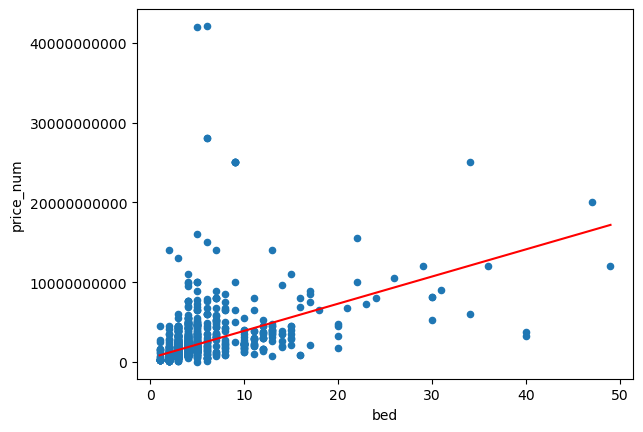

In [176]:
housing_df.plot(kind='scatter', x='bed', y='price_num')
plt.plot(kamar_tidur, prediksi_harga, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [193]:
print(f"intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"slope :{model.coef_}") #slope = delta y / delta x

intercept :811168945.0544589
slope :[3.49946777e+08]


**Prediksi harga berdasarkan banyak kamar mandi**

In [179]:
model = LinearRegression()
bath = np.array(housing_df['bath']).reshape(-1,1)
model.fit(bath, housing_df['price_num'])

LinearRegression()

In [181]:
kamar_mandi = np.array([housing_df.bath.min(),1,2,3,4,5,10,15,20,30,housing_df.bath.max()]).reshape(-1,1)
kamar_mandi

array([[ 1.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [10.],
       [15.],
       [20.],
       [30.],
       [49.]])

In [183]:
prediksi_harga = model.predict(kamar_mandi)
prediksi_harga

array([1.16111572e+09, 1.16111572e+09, 1.51106250e+09, 1.86100928e+09,
       2.21095605e+09, 2.56090283e+09, 4.31063672e+09, 6.06037060e+09,
       7.81010449e+09, 1.13095723e+10, 1.79585610e+10])

In [185]:
for km, hrg in zip(kamar_mandi, prediksi_harga):
    print(f"kamar mandi: {km} prediksi harga: {hrg}")

kamar mandi: [1.] prediksi harga: 1161115722.1569018
kamar mandi: [1.] prediksi harga: 1161115722.1569018
kamar mandi: [2.] prediksi harga: 1511062499.259345
kamar mandi: [3.] prediksi harga: 1861009276.3617883
kamar mandi: [4.] prediksi harga: 2210956053.4642315
kamar mandi: [5.] prediksi harga: 2560902830.566674
kamar mandi: [10.] prediksi harga: 4310636716.07889
kamar mandi: [15.] prediksi harga: 6060370601.591105
kamar mandi: [20.] prediksi harga: 7810104487.103321
kamar mandi: [30.] prediksi harga: 11309572258.127752
kamar mandi: [49.] prediksi harga: 17958561023.074173


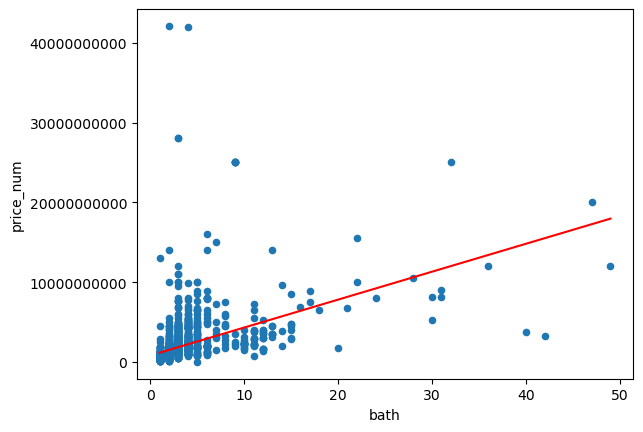

In [187]:
housing_df.plot(kind='scatter', x='bath', y='price_num')
plt.plot(kamar_mandi, prediksi_harga, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [195]:
print(f"intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"slope :{model.coef_}") #slope = delta y / delta x

intercept :811168945.0544589
slope :[3.49946777e+08]


**Prediksi harga berdasarkan banyak carport**

In [198]:
model = LinearRegression()
carport = np.array(housing_df['carport']).reshape(-1,1)
model.fit(carport, housing_df['price_num'])

LinearRegression()

In [200]:
banyak_carport = np.array([housing_df.carport.min(),1,2,3,4,5,10,15,20,30,housing_df.carport.max()]).reshape(-1,1)
banyak_carport

array([[ 1.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [10.],
       [15.],
       [20.],
       [30.],
       [15.]])

In [202]:
prediksi_harga = model.predict(banyak_carport)
prediksi_harga

array([1.47432939e+09, 1.47432939e+09, 2.24575558e+09, 3.01718177e+09,
       3.78860796e+09, 4.56003415e+09, 8.41716511e+09, 1.22742961e+10,
       1.61314270e+10, 2.38456889e+10, 1.22742961e+10])

In [204]:
for c, hrg in zip(banyak_carport, prediksi_harga):
    print(f"carport: {c} prediksi harga: {hrg}")

carport: [1.] prediksi harga: 1474329390.0394642
carport: [1.] prediksi harga: 1474329390.0394642
carport: [2.] prediksi harga: 2245755580.9584217
carport: [3.] prediksi harga: 3017181771.8773785
carport: [4.] prediksi harga: 3788607962.796336
carport: [5.] prediksi harga: 4560034153.715293
carport: [10.] prediksi harga: 8417165108.31008
carport: [15.] prediksi harga: 12274296062.904865
carport: [20.] prediksi harga: 16131427017.499651
carport: [30.] prediksi harga: 23845688926.689224
carport: [15.] prediksi harga: 12274296062.904865


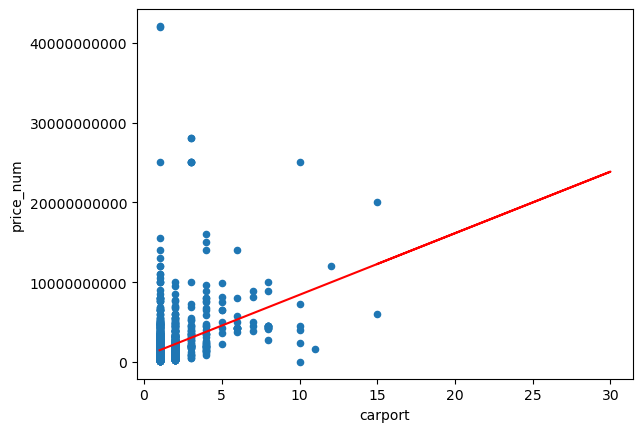

In [206]:
housing_df.plot(kind='scatter', x='carport', y='price_num')
plt.plot(banyak_carport, prediksi_harga, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [208]:
print(f"intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"slope :{model.coef_}") #slope = delta y / delta x

intercept :702903199.120507
slope :[7.71426191e+08]


**Prediksi harga berdasarkan luas tanah**

In [212]:
model = LinearRegression()
sa = np.array(housing_df['sa_num']).reshape(-1,1)
model.fit(sa, housing_df['price_num'])

LinearRegression()

In [214]:
luas_tanah = np.array([housing_df.sa_num.min(),4,30,80,100,500,1000,1500,2000,3000,housing_df.sa_num.max()]
                     ).reshape(-1,1)
luas_tanah

array([[4.000e+00],
       [4.000e+00],
       [3.000e+01],
       [8.000e+01],
       [1.000e+02],
       [5.000e+02],
       [1.000e+03],
       [1.500e+03],
       [2.000e+03],
       [3.000e+03],
       [4.222e+03]])

In [216]:
prediksi_harga = model.predict(luas_tanah)
prediksi_harga

array([6.53112239e+08, 6.53112239e+08, 8.23013561e+08, 1.14974687e+09,
       1.28044020e+09, 3.89430669e+09, 7.16163980e+09, 1.04289729e+10,
       1.36963060e+10, 2.02309723e+10, 2.82163344e+10])

In [218]:
for sa, hrg in zip(luas_tanah, prediksi_harga):
    print(f"luas tanah: {sa} prediksi harga: {hrg}")

luas tanah: [4.] prediksi harga: 653112239.3217474
luas tanah: [4.] prediksi harga: 653112239.3217474
luas tanah: [30.] prediksi harga: 823013561.1958466
luas tanah: [80.] prediksi harga: 1149746872.4921913
luas tanah: [100.] prediksi harga: 1280440197.0107293
luas tanah: [500.] prediksi harga: 3894306687.381487
luas tanah: [1000.] prediksi harga: 7161639800.344934
luas tanah: [1500.] prediksi harga: 10428972913.30838
luas tanah: [2000.] prediksi harga: 13696306026.271828
luas tanah: [3000.] prediksi harga: 20230972252.198723
luas tanah: [4222.] prediksi harga: 28216334380.281387


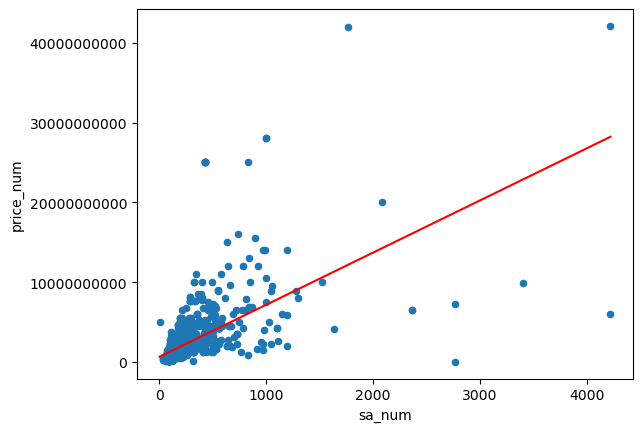

In [222]:
housing_df.plot(kind='scatter', x='sa_num', y='price_num')
plt.plot(luas_tanah, prediksi_harga, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [224]:
print(f"intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"slope :{model.coef_}") #slope = delta y / delta x

intercept :558792432.8807268
slope :[8595116.13913488]


**Prediksi harga berdasarkan luas bangunan**

In [227]:
model = LinearRegression()
ba = np.array(housing_df['ba_num']).reshape(-1,1)
model.fit(ba, housing_df['price_num'])

LinearRegression()

In [229]:
luas_bangunan = np.array([housing_df.ba_num.min(),4,30,80,100,500,1000,1500,2000,3000,housing_df.ba_num.max()]
                        ).reshape(-1,1)
luas_bangunan

array([[4.00e+00],
       [4.00e+00],
       [3.00e+01],
       [8.00e+01],
       [1.00e+02],
       [5.00e+02],
       [1.00e+03],
       [1.50e+03],
       [2.00e+03],
       [3.00e+03],
       [5.07e+03]])

In [231]:
prediksi_harga = model.predict(luas_bangunan)
prediksi_harga

array([5.93172897e+08, 5.93172897e+08, 8.16645917e+08, 1.24640172e+09,
       1.41830405e+09, 4.85635050e+09, 9.15390857e+09, 1.34514666e+10,
       1.77490247e+10, 2.63441409e+10, 4.41360313e+10])

In [233]:
for ba, hrg in zip(luas_bangunan, prediksi_harga):
    print(f"luas bangunan: {ba} prediksi harga: {hrg}")

luas bangunan: [4.] prediksi harga: 593172897.4372663
luas bangunan: [4.] prediksi harga: 593172897.4372663
luas bangunan: [30.] prediksi harga: 816645917.0547731
luas bangunan: [80.] prediksi harga: 1246401724.011517
luas bangunan: [100.] prediksi harga: 1418304046.7942145
luas bangunan: [500.] prediksi harga: 4856350502.448165
luas bangunan: [1000.] prediksi harga: 9153908572.015602
luas bangunan: [1500.] prediksi harga: 13451466641.583042
luas bangunan: [2000.] prediksi harga: 17749024711.15048
luas bangunan: [3000.] prediksi harga: 26344140850.285355
luas bangunan: [5070.] prediksi harga: 44136031258.294556


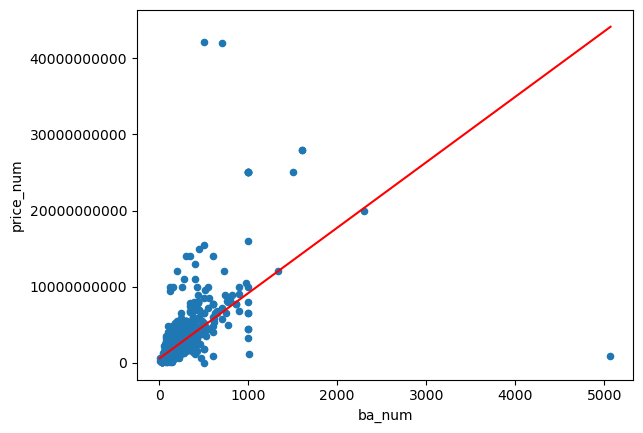

In [235]:
housing_df.plot(kind='scatter', x='ba_num', y='price_num')
plt.plot(luas_bangunan, prediksi_harga, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [239]:
print(f"intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"slope :{model.coef_}") #slope = delta y / delta x

intercept :558792432.8807268
slope :[8595116.13913488]
